### 2D Demonstration Workflow

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy* [e-book]. Zenodo. doi:10.5281/zenodo.15169133 [![DOI](https://zenodo.org/badge/838927017.svg)](https://doi.org/10.5281/zenodo.15169132)  
```

The workflows in this book and more are available here:

```{admonition} Cite the GeostatsPyDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *GeostatsPyDemos: GeostatsPy Python Package for Spatial Data Analytics and Geostatistics Demonstration Workflows Repository* (0.0.1) [Software]. Zenodo. doi:10.5281/zenodo.12667036. GitHub Repository: https://github.com/GeostatsGuy/GeostatsPyDemos [![DOI](https://zenodo.org/badge/777871341.svg)](https://doi.org/10.5281/zenodo.12667035)



```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of a **Complete Demonstration Workflow** with a 2D example.

**YouTube Lecture**: check out my complete lecture playlist on:

* [Data Analytics and Geostatistics](https://youtube.com/playlist?list=PLG19vXLQHvSB-D4XKYieEku9GQMQyAzjJ&si=C5RK9p1vJ9anfxtj)

#### Motivation for a Complete Demonstration Workflow.

All of the workflow steps are available in the other e-book chapter, for example,

* [Plotting Spatial Data and Models](https://geostatsguy.github.io/GeostatsPyDemos_Book/GeostatsPy_plotting_spatial_data_models.html)

*  [Univariate Analysis](https://geostatsguy.github.io/GeostatsPyDemos_Book/GeostatsPy_univariate_statistics.html)

*  [Bivariate Analysis](https://geostatsguy.github.io/GeostatsPyDemos_Book/GeostatsPy_bivariate.html)

*  [Debiasing Spatial Data](https://geostatsguy.github.io/GeostatsPyDemos_Book/GeostatsPy_declustering.html)

*  [Spatial Analysis](https://geostatsguy.github.io/GeostatsPyDemos_Book/GeostatsPy_variogram_calculation_and_modeling.html)

*  [Spatial Estimation](https://geostatsguy.github.io/GeostatsPyDemos_Book/GeostatsPy_kriging.html)

*  [Spatial Simulation](https://geostatsguy.github.io/GeostatsPyDemos_Book/GeostatsPy_simulation.html)

*  [Model Checking](https://geostatsguy.github.io/GeostatsPyDemos_Book/GeostatsPy_model_checking.html)

*  [Uncertainty Analysis](https://geostatsguy.github.io/GeostatsPyDemos_Book/GeostatsPy_simulation_postsim.html)

*  [Decision Making](https://geostatsguy.github.io/GeostatsPyDemos_Book/GeostatsPy_decision_making.html)

Yet, I encounter students that struggling with putting all of this together! This chapter puts all of this together to demonstrate how all these parts work together with general workflow that will be useful for many spatial modeling cases.

```{admonition} This is not a panacea workflow!
:class: remove-from-content-only

This is a good, general spatial modeling workflow, but your must consider the modeling goal and available resources when designing your own spatial modeling workflows. 
```

#### Spatial Modeling Workflow Steps


#### Load the Required Libraries

The following code loads the required libraries. 

In [1]:
import geostatspy.GSLIB as GSLIB                              # GSLIB utilities, visualization and wrapper
import geostatspy.geostats as geostats                        # GSLIB methods convert to Python      
import geostatspy
print('GeostatsPy version: ' + str(geostatspy.__version__))

GeostatsPy version: 0.0.78


We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
import os                                                     # set working directory, run executables

from tqdm import tqdm                                         # suppress the status bar
from functools import partialmethod
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)

ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrays for gridded data
import pandas as pd                                           # DataFrames for tabular data
import matplotlib.pyplot as plt                               # for plotting
import matplotlib as mpl                                      # custom colorbar
import matplotlib.ticker as ticker                            # custom axes
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from matplotlib import gridspec                               # custom subplots
formatter = ticker.FuncFormatter(lambda x, _: f'{x:,.0f}')    # commas on axes
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
from IPython.utils import io                                  # mute output from simulation
cmap = plt.cm.inferno                                         # color map
seed = 13                                                     # random number seed
burnt_orange = '#BF5700'

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Make Custom Colorbar

We make this colorbar to display our categorical, sand and shale facies.

In [3]:
cmap_facies = mpl.colors.ListedColormap(['grey','gold'])
cmap_facies.set_over('white'); cmap_facies.set_under('white')

#### Declare Functions

Here are some convenience functions including,

1. add major and minor gridlines

2. location maps formatted for binary, sand and shale facies.

3. histogram formatted for bianry, sand and shale facies.

4. improved formmatting for axes labels

In [4]:
def add_grid2():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks  

def add_grid(sub_plot):
    sub_plot.grid(True, which='major',linewidth = 1.0); sub_plot.grid(True, which='minor',linewidth = 0.2) # add y grids
    sub_plot.tick_params(which='major',length=7); sub_plot.tick_params(which='minor', length=4)
    sub_plot.xaxis.set_minor_locator(AutoMinorLocator()); sub_plot.yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks

def locmap_facies(df,xcol,ycol,vcol,xmin,xmax,ymin,ymax,vmin,vmax,title,xlabel,ylabel,vlabel,cmap):
    im = plt.scatter(df[xcol],df[ycol],s=None,c=df[vcol],marker=None,cmap=cmap,norm=None,
                     vmin=vmin,vmax=vmax,alpha=0.8,linewidths=0.8,edgecolors="black",)
    plt.title(title); plt.xlim(xmin,xmax); plt.ylim(ymin,ymax); plt.xlabel(xlabel); plt.ylabel(ylabel)
    plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))
    cbar = plt.colorbar(im, orientation="vertical")
    cbar.set_label(vlabel, rotation=270, labelpad=20)
    cbar.set_ticks([0, 1]); cbar.set_ticklabels(['Shale', 'Sand'])
    
def hist_sand_shale(df,vcol,title):
    n, bins, patches = plt.hist(df[vcol], bins=[-0.5, 0.5, 1.5], rwidth=0.8,edgecolor='black')
    patches[0].set_facecolor('grey'); patches[1].set_facecolor('gold') # Set custom colors for each bar
    plt.xticks([0, 1], ['Shalestone', 'Sandstone'])
    plt.ylabel('Frequency'); plt.title(title)
    plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator()); 
    plt.grid(axis='y', which='major',lw=1,linestyle='-',alpha=0.7); plt.grid(axis='y', which='minor',lw=0.5,linestyle='-',alpha=0.4)

def get_formatter(x,type):
    if type == 'small':
        return ticker.FuncFormatter(lambda x, _: f'{x:.2f}')
    if type == 'large':
        return ticker.FuncFormatter(lambda x, _: f'{x:,.0f}')
    if type == 'int':
        return ticker.FuncFormatter(lambda x, _: f'{int(x)}')
    if type == 'one':
        return ticker.FuncFormatter(lambda x, _: f'{x:.1f}')

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [5]:
#os.chdir("c:/PGE383")                                        # set the working directory

#### Load Tabular and Gridded Datasets

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object. 

The dataset includes, 

1. sparsely sampled spatial well data,

| Full Name    | Name     | Units     | Description                              |
|:--------------:|:----------:|:-----------:|------------------------------------------|
| X            | X        | $m$    | x coordinate                             |
| Y            | Y        | $m$    | y coordinate                             |
| Facies       | Facies   | indicator | 0 = shalestone, 1 = sandstone            |
| Porosity     | Porosity | ratio  | effective porosity                       |
| Permeability | Perm     | $mD$ | isotropic, horizontal                 |
| Acoustic Impedance | AI | $\frac{kg}{m^2 \cdot s}$ | interpolated from seismic |

2. exahustively sampled seismic data,

| Full Name    | Name     | Units     | Description                              |
|:--------------:|:----------:|:-----------:|------------------------------------------|
| Acoustic Impedance | AI | $\frac{kg}{m^2 \cdot s}$ | interpolated from seismic |

In [6]:
df_12 = pd.read_csv(r"https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/12_sample_data.csv")
AI_12 = np.loadtxt(r'https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/12_AI.csv', delimiter=',')
df_12 = df_12.iloc[:,1:]; df_12 = df_12.rename(columns = {'Porosity':'Por'})    # clean up the data table
df_12.head()

X            Y  Facies       Por        Perm           AI
0  502.929859  9008.972357       1  0.220761  140.021266  3413.063944
1  508.696361  8505.744515       1  0.237154   39.837129  3074.562617
2  503.892888  8003.429847       1  0.234352   84.992437  2292.783358
3  508.230145  7509.751406       1  0.244553   90.632307  2494.848885
4  500.611637  7000.684230       1  0.231787  811.547979  2522.063995

##### Dataset and Grid Dictionary

Here's a dictionary with all the information for each feature from this dataset.

In [7]:
twelve = {
    "Facies": {
        "min": 0,
        "max": 1,
        "colormap": "cmap_facies",         
        "name": "Facies","fname": "Facies",
        "units": "Sand - 1, Shale - 0",
        "map": None,'format': 'int'
    },
    "Por": {
        "min": 0.1,
        "max": 0.3,
        "colormap": "inferno",       
        "name": "Porosity","fname": "Por",
        "units": "fraction",
        "map": None,'format': 'small'
    },
    "Perm": {
        "min": 0.01,
        "max": 2000,
        "colormap": "inferno",       
        "name": "Permeability","fname": "Perm",
        "units": "mD",
        "map": None,'format': 'large'
    },
    "AI": {
        "min": 1500,
        "max": 6500,
        "colormap": "inferno",
        "name": "Acoustic Impedance","fname": "AI",
        "units": r"$\frac{kg}{m^2 \cdot s} \times 10^3$",
        "map": AI_12,'format': 'large'
    },
}

grid = {
    "nx":100,
    "ny":100,
    "xsiz":100.0,
    "ysiz":100.0,
    "xmn":50.0,
    "ymn":50.0,
    "xmin":0.0,
    "xmax":10000.0,
    "ymin":0.0,
    "ymax":10000.0
}

##### Visualize the Dataset

Now we can load and visualize the synthetic dataset.

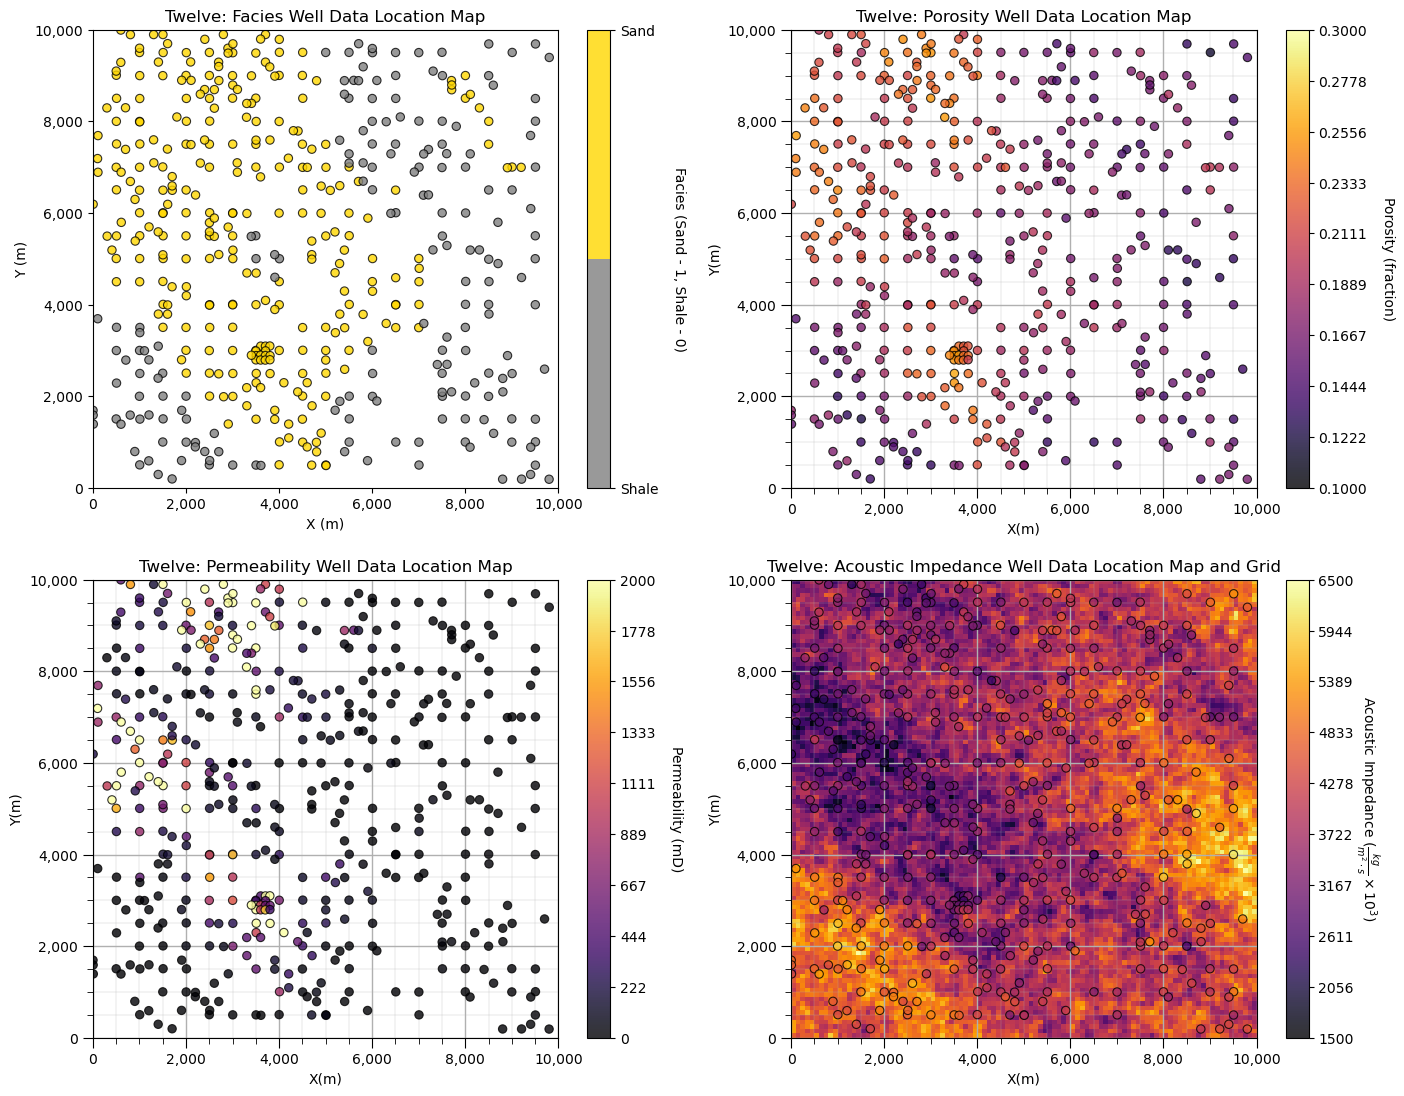

In [8]:
nbin = 20                                                     # number of histogram bins

for ifeature, feature in enumerate(twelve):                   # loop over features
    plt.subplot(2,2,(ifeature)+1)
    if feature == 'Facies':
        locmap_facies(df_12,'X','Y',twelve[feature]["fname"],grid['xmin'],grid['xmax'],grid['ymin'],grid['ymax'],twelve[feature]["min"],
                twelve[feature]["max"],'Twelve: ' + twelve[feature]["fname"] + ' Well Data Location Map','X (m)','Y (m)',
                twelve[feature]["name"] + ' (' + twelve[feature]["units"] + ')',cmap_facies)
    else:
        sc = GSLIB.locmap_st(df_12,'X','Y',twelve[feature]["fname"],grid['xmin'],grid['xmax'],grid['ymin'],grid['ymax'],twelve[feature]["min"],
                twelve[feature]["max"],'Twelve: ' + twelve[feature]["name"] + ' Well Data Location Map','X(m)','Y(m)',
                twelve[feature]["name"] + ' (' + twelve[feature]["units"] + ')',twelve[feature]["colormap"]); add_grid2()
        if twelve[feature]["map"] is not None:
            im = plt.imshow(AI_12,interpolation = None,extent = [grid['xmin'],grid['xmax'],grid['ymax'],grid['ymin']],
                    vmin=twelve[feature]["min"],vmax=twelve[feature]["max"],
                    origin='lower',aspect='auto',cmap=twelve[feature]["colormap"])
            plt.title('Twelve: ' + twelve[feature]['name'] + ' Well Data Location Map and Grid')
        fformatter = get_formatter(np.linspace(twelve[feature]['min'],twelve[feature]['max'],10),'large')
        plt.gca().xaxis.set_major_formatter(fformatter)
        plt.gca().yaxis.set_major_formatter(fformatter)
    
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.2, hspace=0.2); plt.show()

#### Univariate Analysis

Now let's look at the univariate distributions.

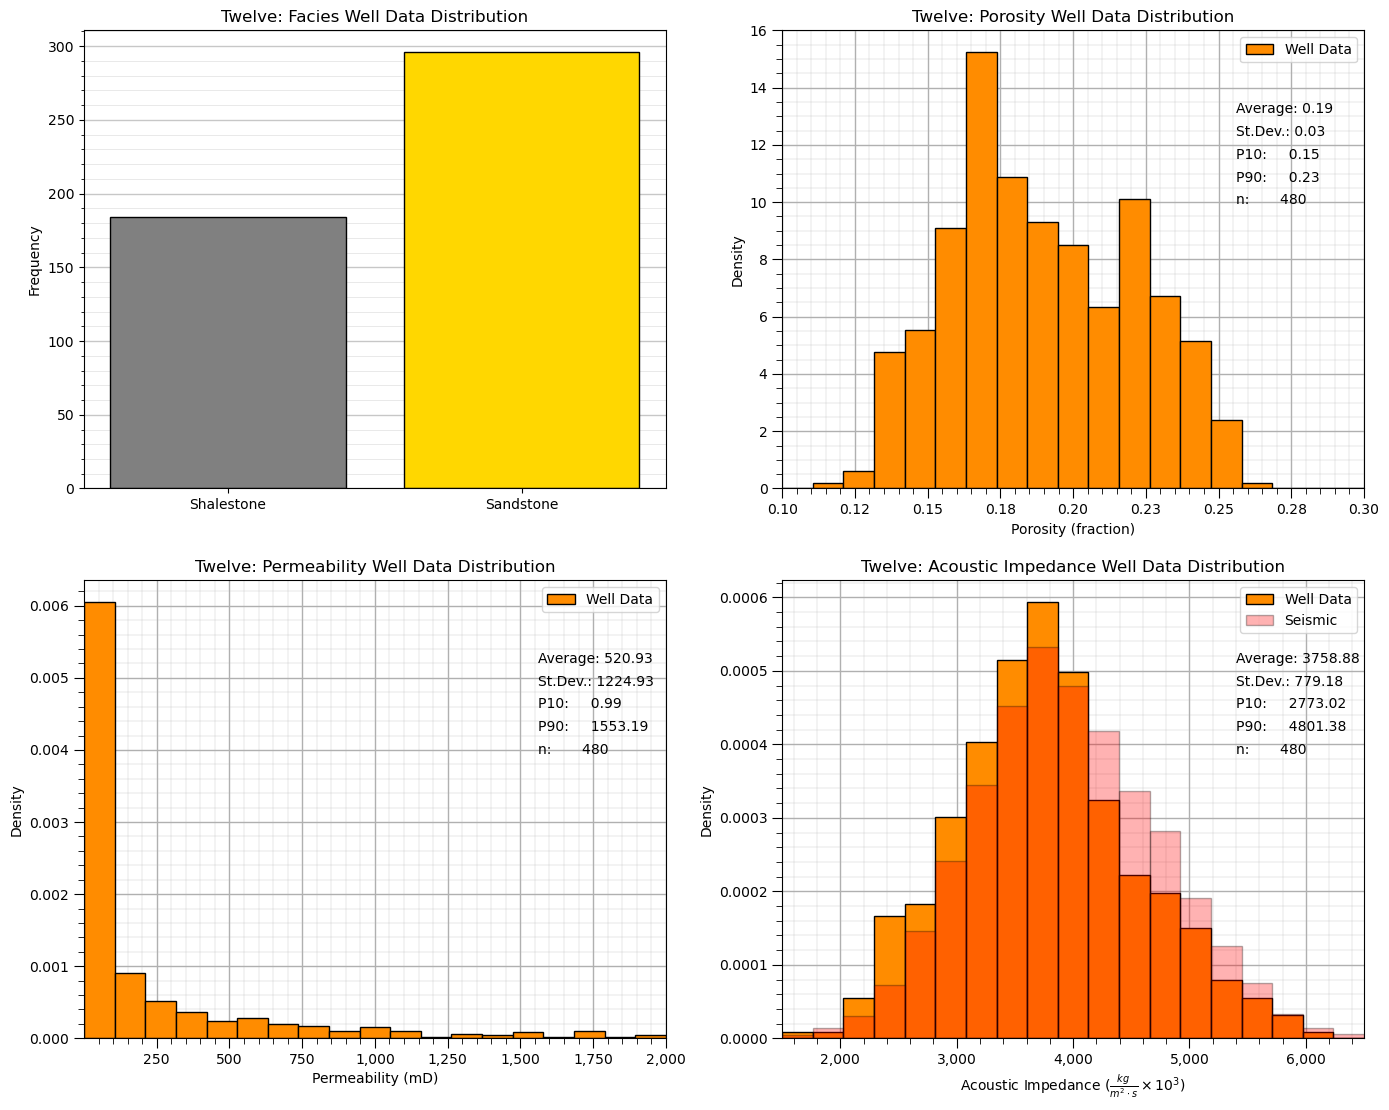

In [9]:
nbin = 20                                                     # number of histogram bins

for ifeature, feature in enumerate(twelve):                   # loop over features
    plt.subplot(2,2,(ifeature)+1)
    if feature == 'Facies':         
        hist_sand_shale(df_12,twelve[feature]["fname"],'Twelve: Facies Well Data Distribution')
    else:
        plt.hist(df_12[feature],bins=np.linspace(twelve[feature]["min"],twelve[feature]["max"],nbin),color='darkorange',edgecolor='black',
                 density=True,label='Well Data')
        plt.annotate('Average: ' + str(np.round(np.average(df_12[feature].values),2)),[0.78,0.82],xycoords='axes fraction')
        plt.annotate('St.Dev.: ' + str(np.round(np.std(df_12[feature].values),2)),[0.78,0.77],xycoords='axes fraction')
        plt.annotate('P10:     ' + str(np.round(np.percentile(df_12[feature].values,10),2)),[0.78,0.72],xycoords='axes fraction')
        plt.annotate('P90:     ' + str(np.round(np.percentile(df_12[feature].values,90),2)),[0.78,0.67],xycoords='axes fraction')
        plt.annotate('n:       ' + str(np.count_nonzero(~np.isnan(df_12[feature].values))),[0.78,0.62],xycoords='axes fraction')
        fformatter = get_formatter(df_12[feature].values,twelve[feature]["format"])
        plt.gca().xaxis.set_major_formatter(fformatter)
        plt.xlabel(twelve[feature]["name"] + ' (' + twelve[feature]["units"] + ')'); plt.xlim(twelve[feature]["min"],twelve[feature]["max"])
        plt.ylabel('Density')
        plt.title('Twelve: ' + twelve[feature]["name"] +  ' Well Data Distribution'); add_grid2()
        if twelve[feature]["map"] is not None: 
            plt.hist(twelve[feature]["map"].flatten(),bins=np.linspace(twelve[feature]["min"],twelve[feature]["max"],nbin),
                     color='red',edgecolor='black',alpha=0.3,zorder=10,density=True,label='Seismic')
        plt.legend(loc='upper right')
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.2, hspace=0.2); plt.show()

#### Debiasing the Distributions

From ocular inspection of the dataset, it is apparent that the data is sampled in a biased manner. 

* We attempt to mitigate this with cell-based declustering.

First let's check the facies feature.

* since it is shale (0) and sand (1), we are calculating the representative proportion of sand and the compliment proportion of shale

$$
prop_{shale} = 1.0 - prop_{sand}
$$

There are 480 data with:
   mean of      0.6166666666666667 
   min and max  0 and 1
   standard dev 0.486198404860494 


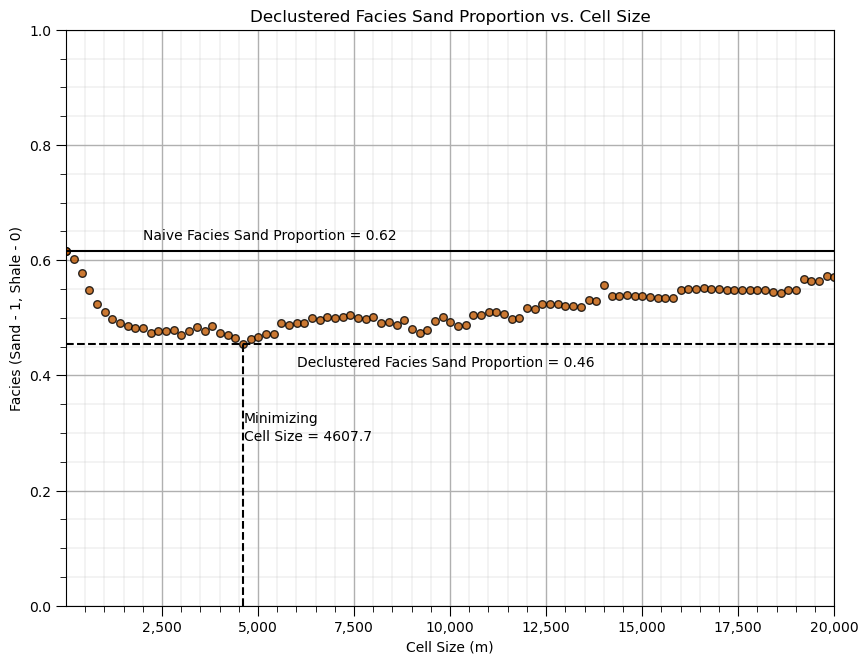

In [10]:
declustered_features = ['Facies','Por','Perm']

ncell = 100; cmin = 10; cmax = 20000; noff = 10; iminmax = 1
feature = 'Facies'

wts, cell_sizes, dmeans = geostats.declus(df_12,'X','Y',feature,iminmax = iminmax,noff = noff,
        ncell = ncell,cmin = cmin,cmax = cmax)                # GeostatsPy's declustering function
df_12[feature + '_Wts'] = wts                                               # add weights to the sample data DataFrame

sand_prop = np.average(df_12[feature].values)
sand_dprop = np.average(df_12[feature].values,weights=df_12[feature + '_Wts'].values)

csize_min = cell_sizes[np.argmin(dmeans)]                     # retrieve the minimizing cell size
smin = 0.0; smax = 1.0                                          # range of statistic on y axis, set to improve visualization

plt.subplot(111)
plt.scatter(cell_sizes,dmeans, s=30, alpha = 0.8, edgecolors = "black", facecolors = burnt_orange)
plt.xlabel('Cell Size (m)')
plt.ylabel(twelve[feature]["name"] + ' (' + twelve[feature]["units"] + ')')
plt.title('Declustered ' + twelve[feature]["name"] + ' Sand Proportion vs. Cell Size')
plt.plot([cmin,cmax],[sand_prop,sand_prop],color = 'black')
plt.plot([cmin,cmax],[sand_dprop,sand_dprop],color = 'black',ls='--')
plt.plot([csize_min,csize_min],[0,sand_dprop],color = 'black',linestyle='dashed')
plt.text(0.1*(cmax - cmin) + cmin, sand_prop+0.02, r'Naive ' + twelve[feature]["name"] + ' Sand Proportion = ' + str(np.round(sand_prop,2)))
plt.text(0.3*(cmax - cmin) + cmin, sand_dprop-0.04, r'Declustered ' + twelve[feature]["name"] + ' Sand Proportion = ' + str(np.round(sand_dprop,2)))
plt.text(csize_min+30,0.70 * (sand_dprop - smin) + smin, r'Minimizing')
plt.text(csize_min+30,0.63 * (sand_dprop - smin) + smin, r'Cell Size = ' + str(np.round(csize_min,1)))
plt.ylim([smin,smax]); plt.xlim(cmin,cmax)
add_grid2(); plt.gca().xaxis.set_major_formatter(formatter)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.2, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

Now let's decluster the porosity feature.

There are 480 data with:
   mean of      0.1894398892479167 
   min and max  0.117561964 and 0.261090681
   standard dev 0.031668598431014224 


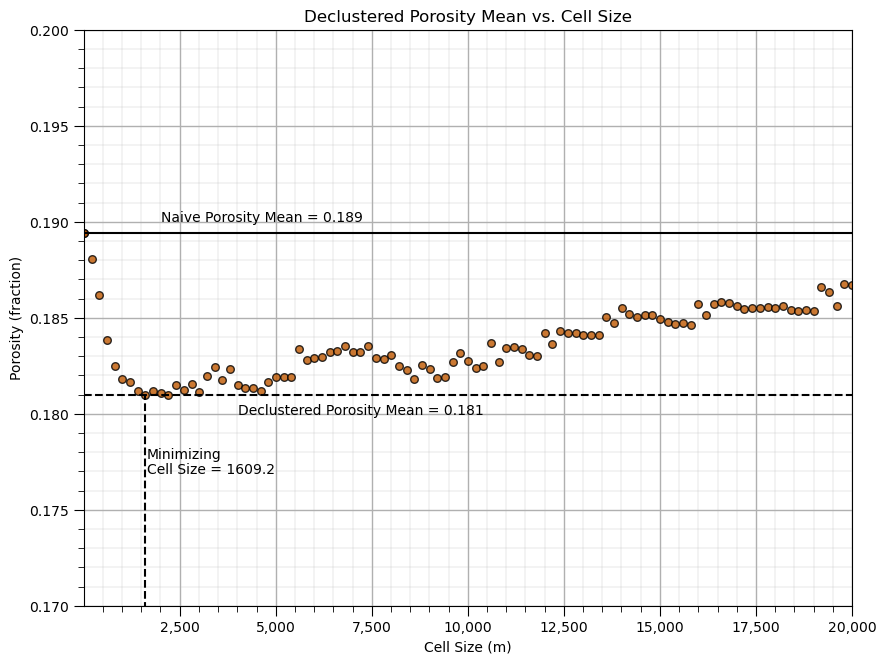

In [11]:
ncell = 100; cmin = 10; cmax = 20000; noff = 10; iminmax = 1
feature = 'Por'

wts, cell_sizes, dmeans = geostats.declus(df_12,'X','Y',feature,iminmax = iminmax,noff = noff,
        ncell = ncell,cmin = cmin,cmax = cmax)                # GeostatsPy's declustering function
df_12[feature + '_Wts'] = wts                                               # add weights to the sample data DataFrame

por_mean = np.average(df_12[feature].values)
por_dmean = np.average(df_12[feature].values,weights=df_12[feature + '_Wts'].values)

csize_min = cell_sizes[np.argmin(dmeans)]                     # retrieve the minimizing cell size
smin = 0.17; smax = 0.20                                          # range of statistic on y axis, set to improve visualization

plt.subplot(111)
plt.scatter(cell_sizes,dmeans, s=30, alpha = 0.8, edgecolors = "black", facecolors = burnt_orange)
plt.xlabel('Cell Size (m)')
plt.ylabel(twelve[feature]["name"] + ' (' + twelve[feature]["units"] + ')')
plt.title('Declustered ' + twelve[feature]["name"] + ' Mean vs. Cell Size')
plt.plot([cmin,cmax],[por_mean,por_mean],color = 'black')
plt.plot([cmin,cmax],[por_dmean,por_dmean],color = 'black',ls='--')
plt.plot([csize_min,csize_min],[0,por_dmean],color = 'black',linestyle='dashed')
plt.text(0.1*(cmax - cmin) + cmin, por_mean+0.0006, r'Naive ' + twelve[feature]["name"] + ' Mean = ' + str(np.round(por_mean,3)))
plt.text(0.2*(cmax - cmin) + cmin, por_dmean-0.001, r'Declustered ' + twelve[feature]["name"] + ' Mean = ' + str(np.round(por_dmean,3)))
plt.text(csize_min+30,0.70 * (por_dmean - smin) + smin, r'Minimizing')
plt.text(csize_min+30,0.63 * (por_dmean - smin) + smin, r'Cell Size = ' + str(np.round(csize_min,1)))
plt.ylim([smin,smax]); plt.xlim(cmin,cmax)
add_grid2(); plt.gca().xaxis.set_major_formatter(formatter)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.2, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

and finally the permeability feature.

There are 480 data with:
   mean of      520.9320931825771 
   min and max  0.005775512 and 10319.90485
   standard dev 1224.929225333125 


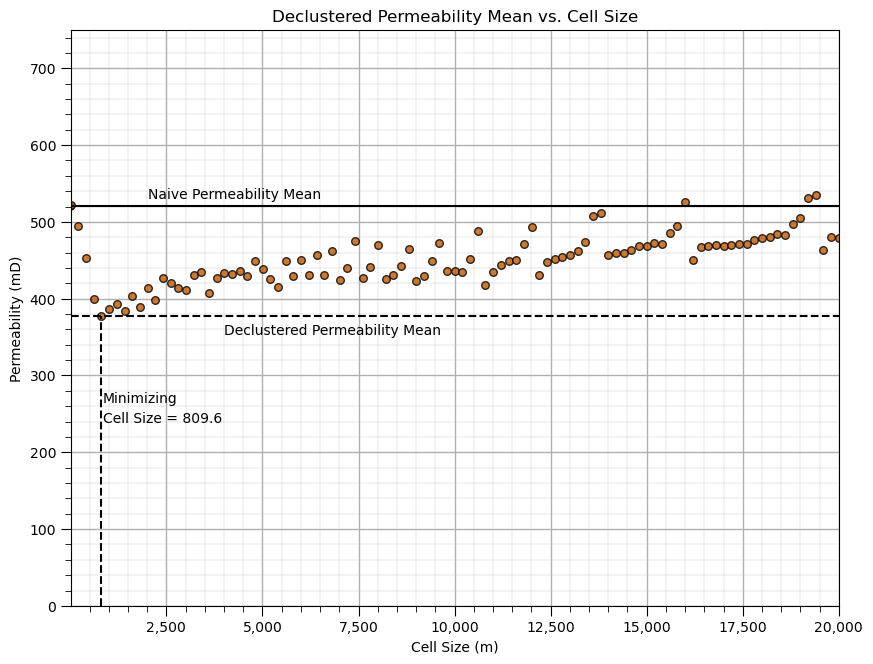

In [12]:
ncell = 100; cmin = 10; cmax = 20000; noff = 10; iminmax = 1
feature = 'Perm'

wts, cell_sizes, dmeans = geostats.declus(df_12,'X','Y',feature,iminmax = iminmax,noff = noff,
        ncell = ncell,cmin = cmin,cmax = cmax)                # GeostatsPy's declustering function
df_12[feature + '_Wts'] = wts                                               # add weights to the sample data DataFrame

perm_mean = np.average(df_12[feature].values)
perm_dmean = np.average(df_12[feature].values,weights=df_12[feature + '_Wts'].values)

csize_min = cell_sizes[np.argmin(dmeans)]                     # retrieve the minimizing cell size
smin = 0.0; smax = 750.0                                      # range of statistic on y axis, set to improve visualization

plt.subplot(111)
plt.scatter(cell_sizes,dmeans, s=30, alpha = 0.8, edgecolors = "black", facecolors = burnt_orange)
plt.xlabel('Cell Size (m)')
plt.ylabel(twelve[feature]["name"] + ' (' + twelve[feature]["units"] + ')')
plt.title('Declustered ' + twelve[feature]["name"] + ' Mean vs. Cell Size')
plt.plot([cmin,cmax],[perm_mean,perm_mean],color = 'black')
plt.plot([cmin,cmax],[perm_dmean,perm_dmean],color = 'black',ls='--')
plt.plot([csize_min,csize_min],[0,perm_dmean],color = 'black',linestyle='dashed')
plt.text(0.1*(cmax - cmin) + cmin, perm_mean+10, r'Naive ' + twelve[feature]["name"] + ' Mean')
plt.text(0.2*(cmax - cmin) + cmin, perm_dmean-25, r'Declustered ' + twelve[feature]["name"] + ' Mean')
plt.text(csize_min+30,0.70 * (perm_dmean - smin) + smin, r'Minimizing')
plt.text(csize_min+30,0.63 * (perm_dmean - smin) + smin, r'Cell Size = ' + str(np.round(csize_min,1)))
plt.ylim([smin,smax]); plt.xlim(cmin,cmax)
add_grid2(); plt.gca().xaxis.set_major_formatter(formatter)
plt.subplots_adjust(left=0.0, bottom=0.0, right=1.2, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

Now, let's visualize,

* location map of the desclustering weights

* declustered histograms

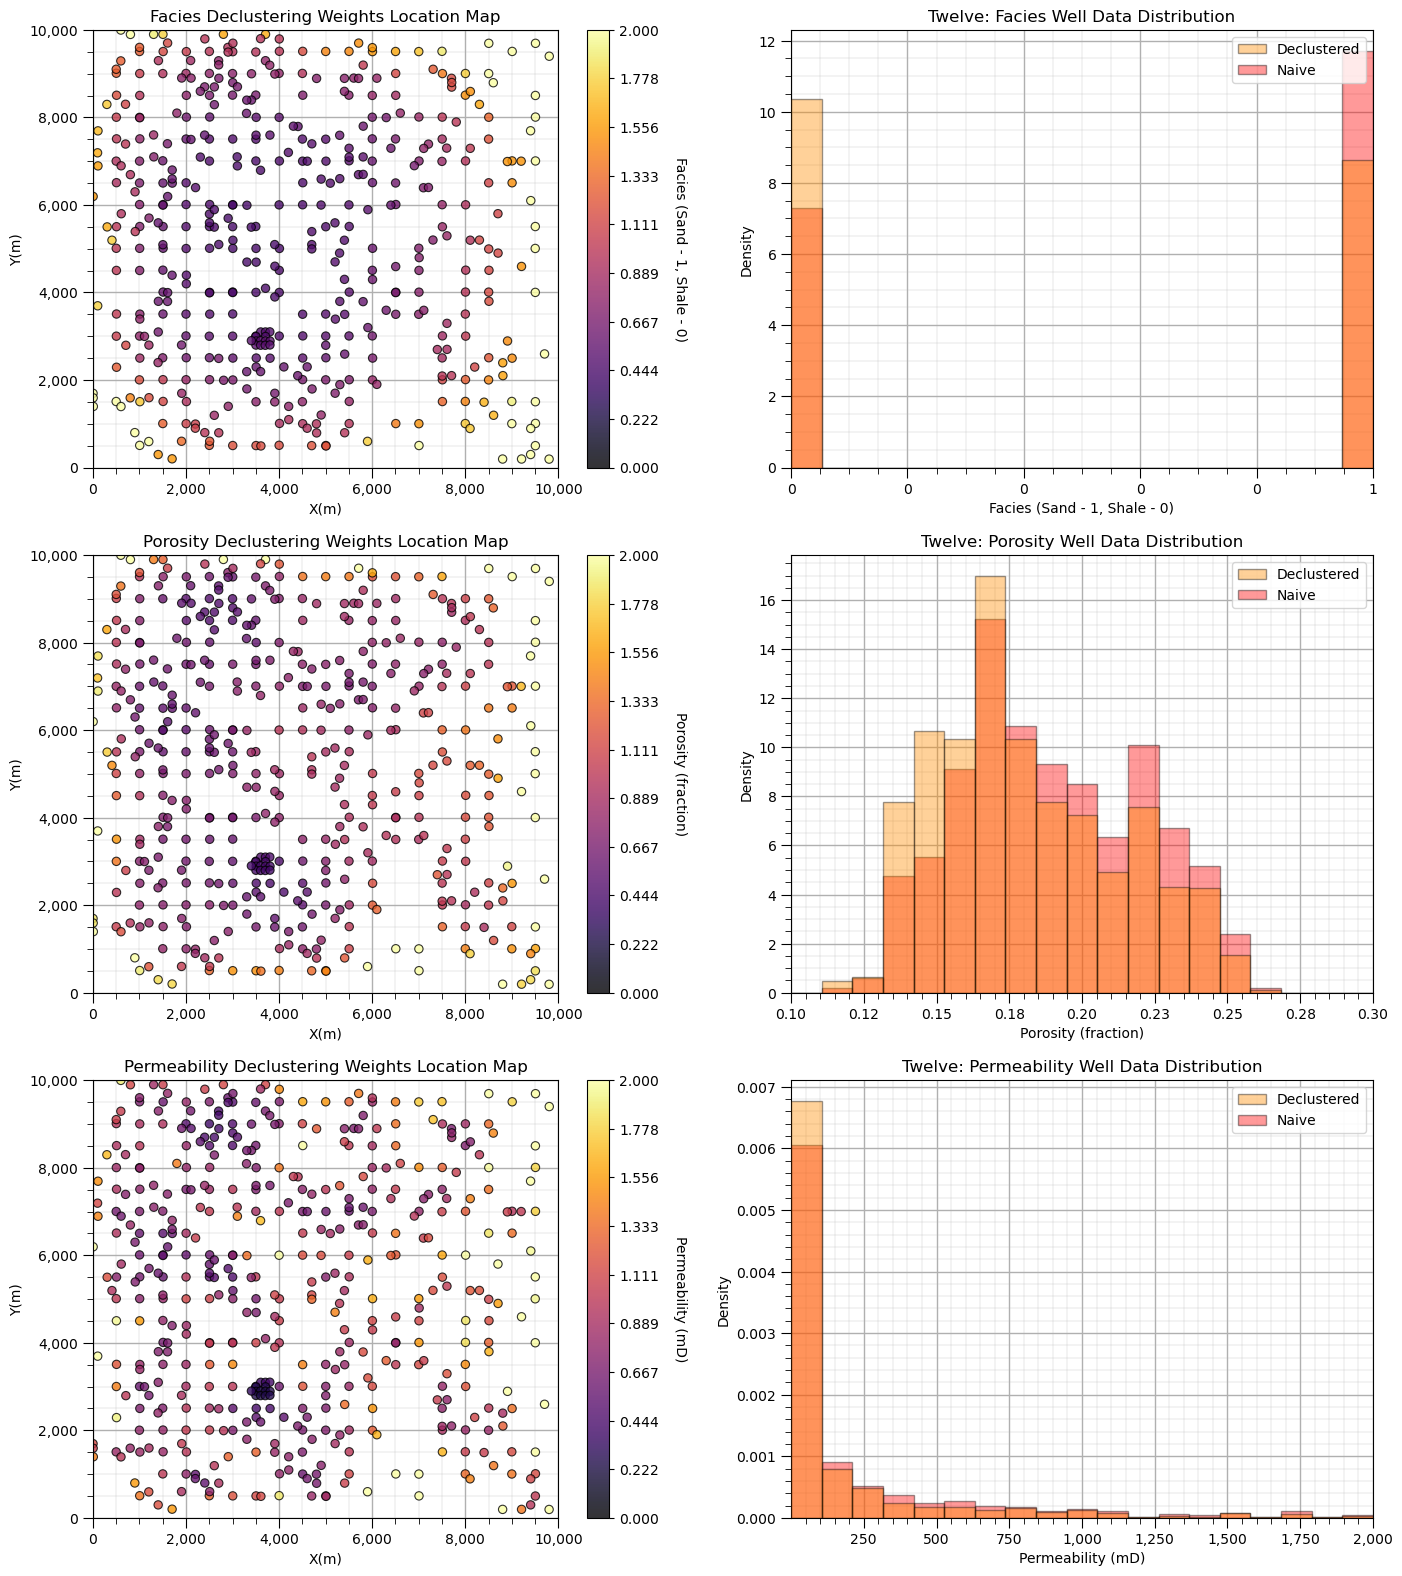

In [13]:
for ifeature, feature in enumerate(declustered_features):                   # loop over features
    plt.subplot(len(declustered_features),2,(ifeature*2)+1)
    sc = GSLIB.locmap_st(df_12,'X','Y',twelve[feature]["fname"]+'_Wts',grid['xmin'],grid['xmax'],grid['ymin'],grid['ymax'],0.0,2.0,
                twelve[feature]["name"] + ' Declustering Weights Location Map','X(m)','Y(m)',
                twelve[feature]["name"] + ' (' + twelve[feature]["units"] + ')',cmap); add_grid2()
    fformatter = get_formatter(np.linspace(twelve[feature]['min'],twelve[feature]['max'],10),'large')
    plt.gca().xaxis.set_major_formatter(fformatter)
    plt.gca().yaxis.set_major_formatter(fformatter)

    plt.subplot(len(declustered_features),2,(ifeature*2)+2)   
    plt.hist(df_12[feature],weights=df_12[feature+'_Wts'],bins=np.linspace(twelve[feature]["min"],twelve[feature]["max"],nbin),
             color='darkorange',edgecolor='black',density=True,alpha=0.4,label='Declustered',zorder=10)
    plt.hist(df_12[feature],bins=np.linspace(twelve[feature]["min"],twelve[feature]["max"],nbin),
             color='red',edgecolor='black',density=True,alpha=0.4,label='Naive',zorder=5)
    fformatter = get_formatter(df_12[feature].values,twelve[feature]["format"])
    plt.gca().xaxis.set_major_formatter(fformatter); plt.legend(loc = 'upper right')
    plt.xlabel(twelve[feature]["name"] + ' (' + twelve[feature]["units"] + ')'); plt.xlim(twelve[feature]["min"],twelve[feature]["max"])
    plt.ylabel('Density'); plt.title('Twelve: ' + twelve[feature]["name"] +  ' Well Data Distribution'); add_grid2()
     
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=3.1, wspace=0.2, hspace=0.2); plt.show()

#### Indicator Facies Variograms

Since we have only two facies, we can just calculate and model a single indicator variogram model.

* since the facies are already 0 (shale) and 1 (sand) we do not need to apply the indicator transformation

 x,y,z offsets = 25.881904828103835,-96.5925825437387


 x,y,z offsets = -96.59258249728337,-25.881905001477506


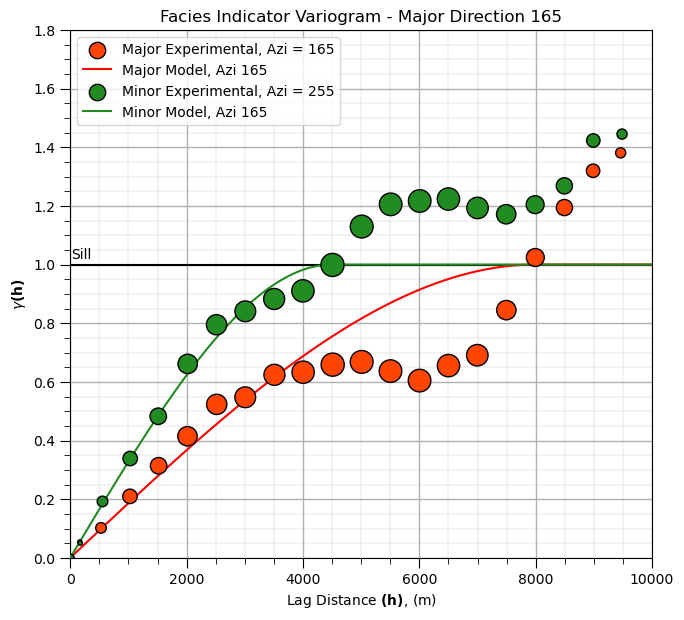

In [14]:
tmin = -9999.; tmax = 9999.; 
lag_dist = 500.0; lag_tol = 250.0; nlag = 20; bandh = 9999.9; azi = 165; atol = 22.5; isill = 1

lag_maj, facies_maj_gamma, facies_maj_npair = geostats.gamv(df_12,"X","Y","Facies",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,
            bandh,isill)
lag_min, facies_min_gamma, facies_min_npair = geostats.gamv(df_12,"X","Y","Facies",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol+90.0,
            bandh,isill)

nug = 0.0; nst = 1
it1 = 1; cc1 = 1.0; azi_facies = 165; hmaj_facies =8000; hmin_facies = 4500                # first structure

vario_facies = GSLIB.make_variogram(nug,nst,it1,cc1,azi_facies,hmaj_facies,hmin_facies)

nlag = 100; xlag = 100; azm = 45                               # project the model in the 045 and 135 azimuth
index_maj,h_maj,gam_maj,cov_maj,ro_maj = geostats.vmodel(nlag,xlag,azi_facies,vario_facies)
index_min,h_min,gam_min,cov_min,ro_min = geostats.vmodel(nlag,xlag,azi_facies+90,vario_facies)

plt.subplot(121)                                              # plot the major variograms
plt.scatter(lag_maj,facies_maj_gamma,color = 'orangered',edgecolor='black',s=facies_maj_npair/17,marker='o',label = 'Major Experimental, Azi = ' + str(azi_facies),zorder=10)
plt.plot(h_maj,gam_maj,color='red',label='Major Model, Azi ' + str(azi_facies))
plt.scatter(lag_min,facies_min_gamma,color = 'forestgreen',edgecolor='black',s=facies_maj_npair/17,marker='o',label = 'Minor Experimental, Azi = ' + str(azi_facies + 90),zorder=10)
plt.plot(h_min,gam_min,color='forestgreen',label='Minor Model, Azi ' + str(azi_facies))
plt.plot([0,10000],[1.0,1.0],color = 'black',zorder=1); plt.annotate('Sill',(15,1.02))
plt.xlabel(r'Lag Distance $\bf(h)$, (m)'); plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Facies Indicator Variogram - Major Direction ' + str(azi))
plt.xlim([0,10000]); plt.ylim([0,1.8]); plt.legend(loc='upper left'); add_grid2()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.2); plt.show()

#### Indicator Simulation of Facies



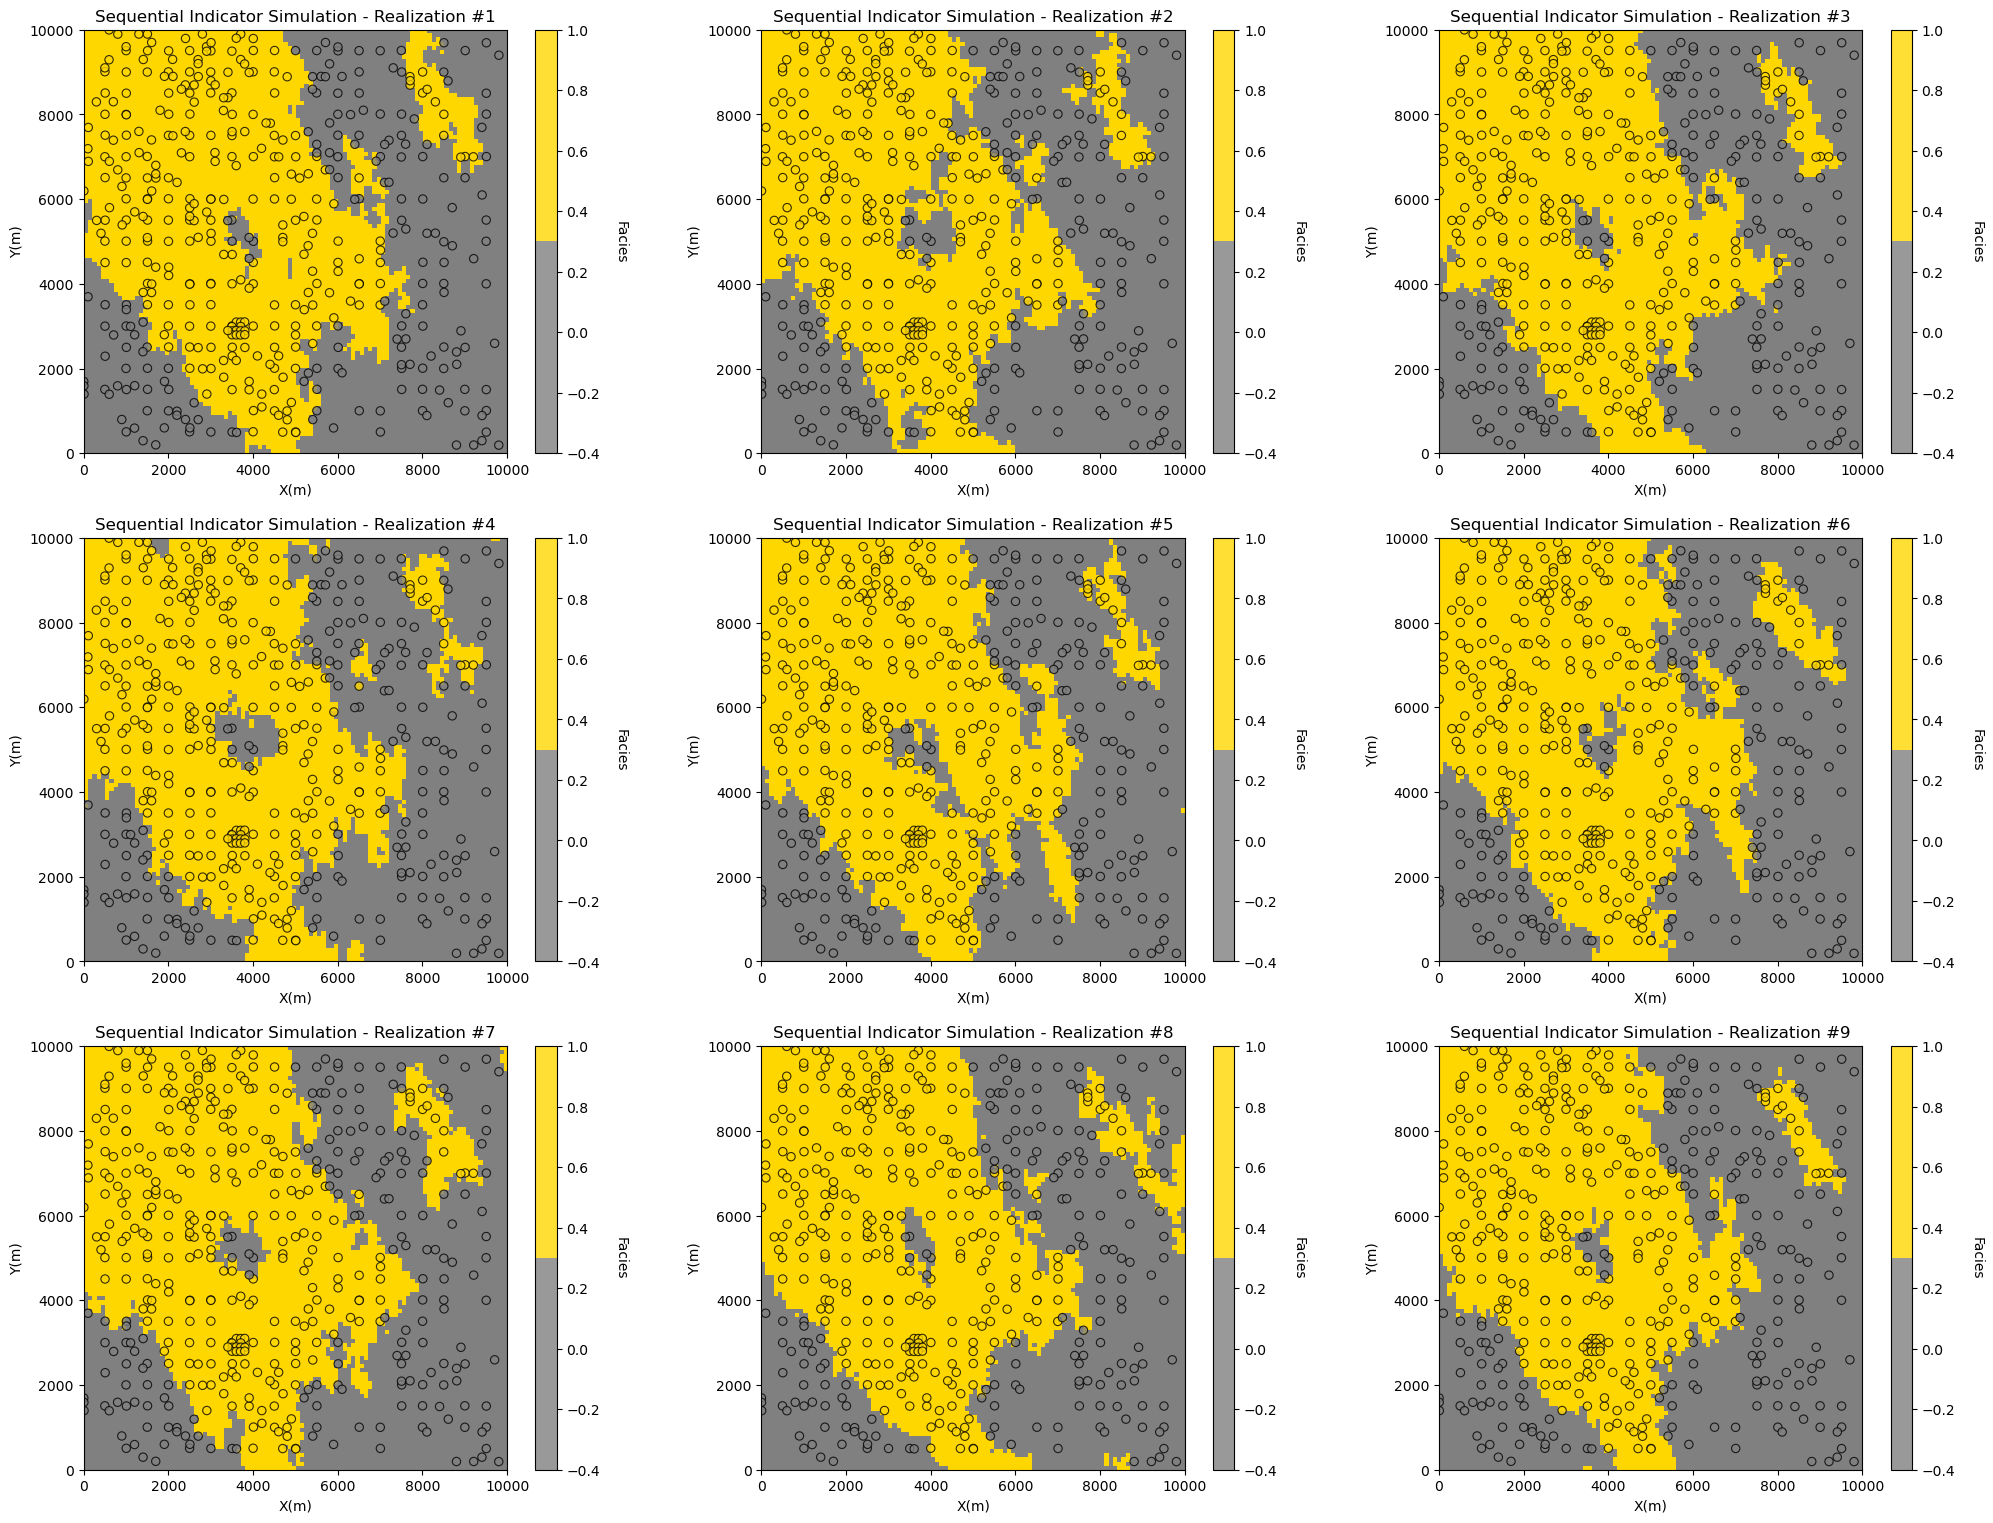

In [15]:
%%capture --no-display        
features_mat = ['Por','Perm']; facies_mat = ['Shale','Sand'] # location maps

ncut = 2                                                      # number of facies
thresh = [0,1]                                                # facies categories (use consistent order for all lists)
gcdf_facies = [1.0 - sand_dprop,sand_dprop]                  # global proportions of the categories (shale, sand)
dummy_trend = np.zeros((10,10))                               # current version requires trend - if wrong size = ignored 

ndmin = 0; ndmax = 10                                         # minimum and maximum data for indicator kriging
nodmax = 10                                                   # maximum previously simulated nodes for indicator kriging
nxdis = 1; nydis = 1                                          # block kriging discretizations
tmin = -999; tmax = 999                                       # data trimming limits

varios = []                                                   # the variogram list
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=azi_facies,hmaj1=hmaj_facies,hmin1=hmin_facies)) # shale ind. vario.
varios.append(GSLIB.make_variogram(nug=0.0,nst=1,it1=1,cc1=1.0,azi1=azi_facies,hmaj1=hmaj_facies,hmin1=hmin_facies)) # sand ind. vario.

run_model = True                                              # run the simulation model
nreal = 9                                                     # number of realizations

if run_model == True:
    sim_facies = np.zeros((nreal,grid['ny'],grid['nx']))
    sim_facies = geostats.sisim(df_12,'X','Y','Facies',ivtype=0,koption=0,ncut=2,thresh=thresh,gcdf=gcdf_facies,trend=dummy_trend,
               tmin=tmin,tmax=tmax,zmin=0.0,zmax=1.0,ltail=1,ltpar=1,middle=1,mpar=0,utail=1,utpar=2,
               nreal=nreal,nx=grid['nx'],xmn=grid['xmn'],xsiz=grid['xsiz'],ny=grid['ny'],ymn=grid['ymn'],ysiz=grid['ysiz'],seed = seed,
               ndmin=ndmin,ndmax=ndmax,nodmax=nodmax,mults=1,nmult=3,noct=-1,ktype=0,vario=varios)

nrow = int(round(((nreal+0.9)/3),0))                          # adjust plot for the number of realizations
for ireal in range(0,nreal):
    plt.subplot(nrow,3,ireal+1)                                  
    GSLIB.locpix_st(sim_facies[ireal],grid['xmin'],grid['xmax'],grid['ymin'],grid['ymax'],grid['xsiz'],-.4,1.0,df_12,'X','Y','Facies',
                'Sequential Indicator Simulation - Realization #' + str(ireal+1),'X(m)','Y(m)','Facies',cmap_facies)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.0*nrow, wspace=0.2, hspace=0.2); plt.show()

#### Split the Dataset by Facies and Gaussian Transformation By-facies

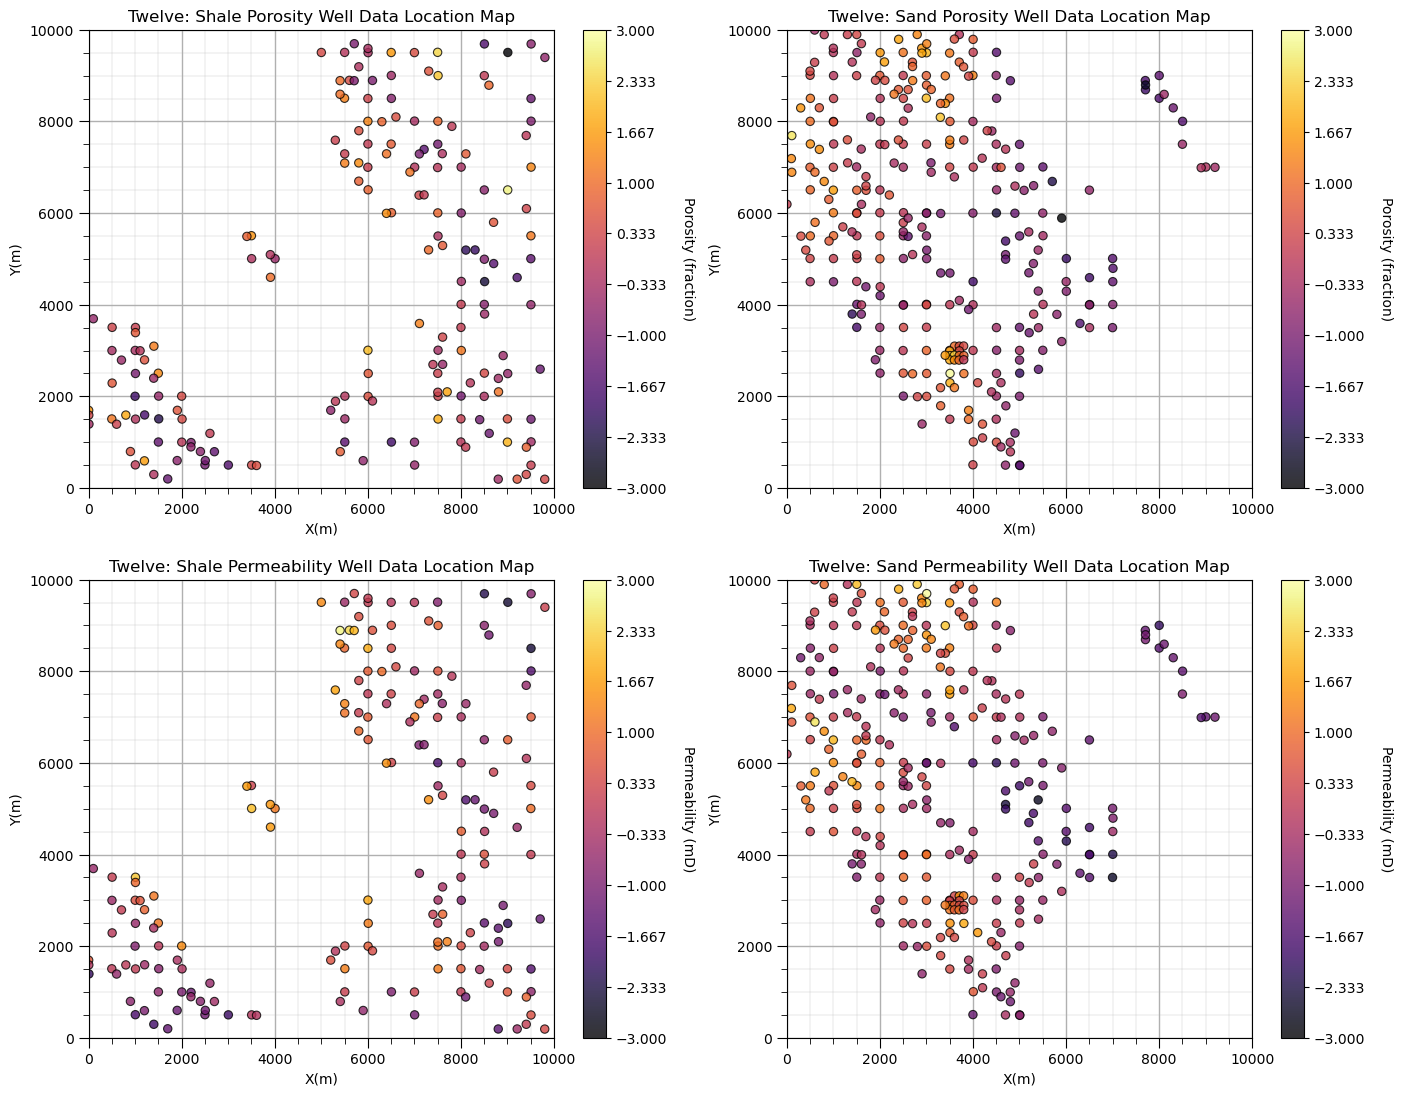

In [16]:
df_12_sand = df_12[df_12['Facies']==1]                       # sand facies
df_12_shale = df_12[df_12['Facies']==0]                      # shale facies

df_12_sand['NPor'], tvPor, tnsPor = geostats.nscore(df_12_sand, 'Por')   # Gaussian transformation by-facies
df_12_sand['NPerm'], tvPor, tnsPor = geostats.nscore(df_12_sand, 'Perm')   
df_12_shale['NPor'], tvPor, tnsPor = geostats.nscore(df_12_shale, 'Por')   
df_12_shale['NPerm'], tvPor, tnsPor = geostats.nscore(df_12_shale, 'Perm')   

features_mat = ['Por','Perm']; facies_mat = ['Shale','Sand'] # location maps
for ifeature, feature in enumerate(features_mat):
    for ifacies, facies in enumerate(facies_mat):
        if facies == 'Shale':
            df_temp = df_12_shale
        if facies == 'Sand':
            df_temp = df_12_sand
        plt.subplot(2,2,(ifeature)*2+(ifacies+1))
        sc = GSLIB.locmap_st(df_temp,'X','Y','N'+twelve[feature]["fname"],grid['xmin'],grid['xmax'],grid['ymin'],grid['ymax'],-3.0,3.0,
            'Twelve: ' + facies + ' ' + twelve[feature]["name"] + ' Well Data Location Map','X(m)','Y(m)',
            twelve[feature]["name"] + ' (' + twelve[feature]["units"] + ')',twelve[feature]["colormap"]); add_grid2()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.2, hspace=0.2); plt.show()

#### Calculate Continuous Feature, By-facies Experimental Variograms

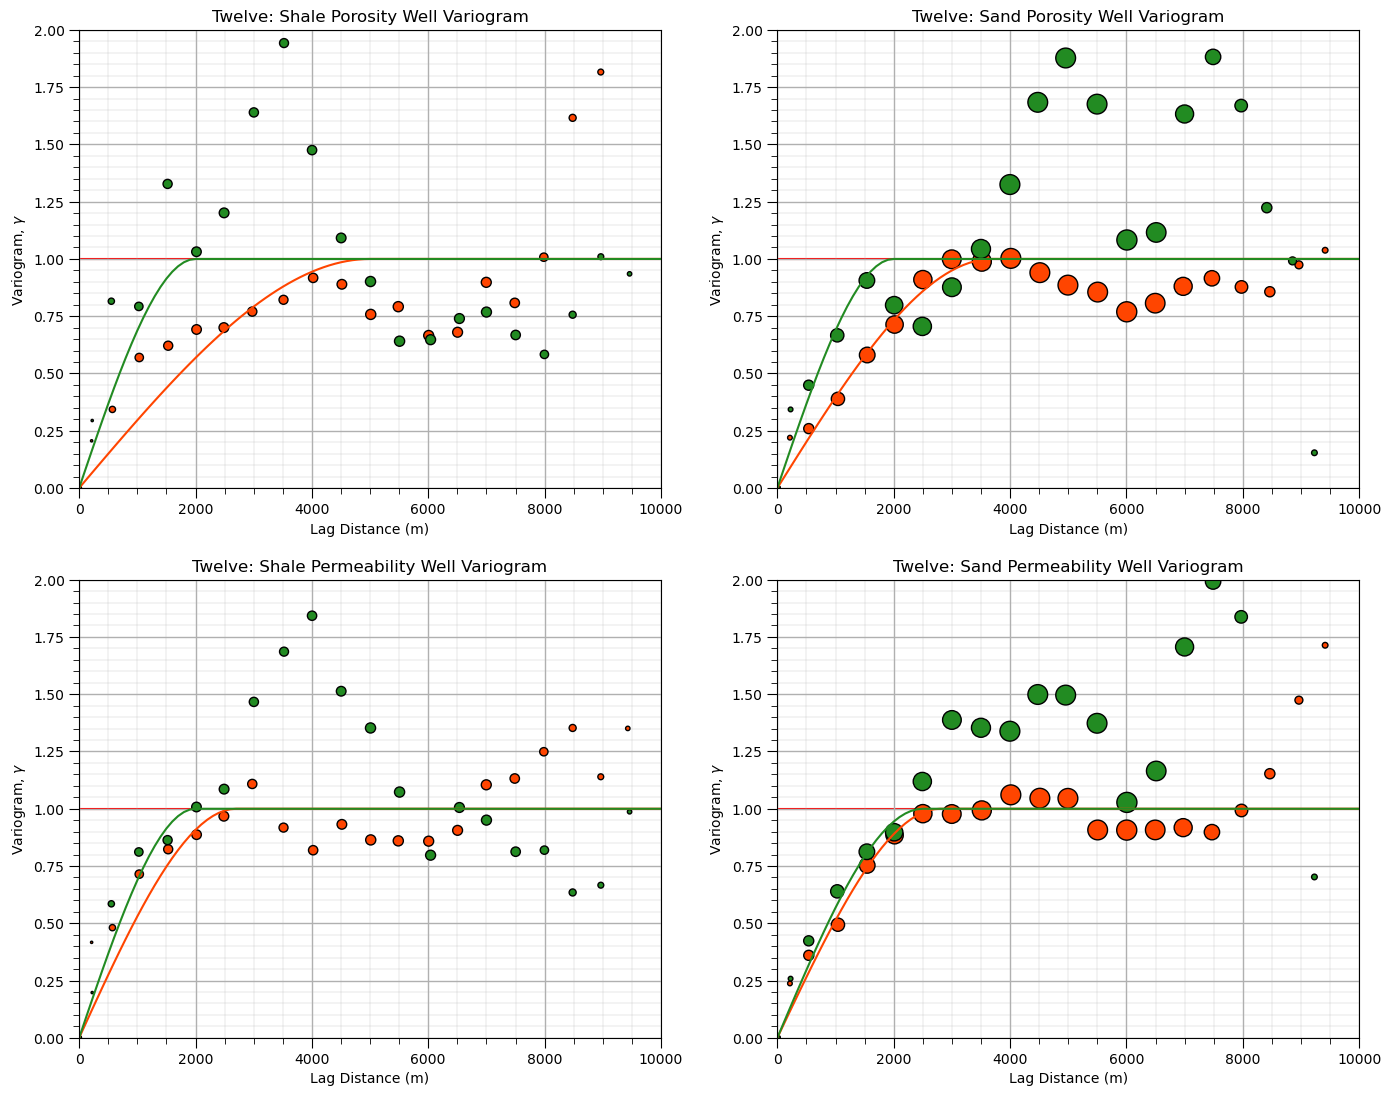

In [17]:
%%capture --no-display 

tmin = -9999.; tmax = 9999.; 
lag_dist = 500.0; lag_tol = 350.0; nlag = 20; bandh = 9999.9; azi = 165; atol = 22.5; isill = 1

lag_maj = np.zeros((len(features_mat),len(facies_mat),nlag+2)); gamma_maj = np.zeros((len(features_mat),len(facies_mat),nlag+2))
npair_maj = np.zeros((len(features_mat),len(facies_mat),nlag+2))
lag_min = np.zeros((len(features_mat),len(facies_mat),nlag+2)); gamma_min = np.zeros((len(features_mat),len(facies_mat),nlag+2))
npair_min = np.zeros((len(features_mat),len(facies_mat),nlag+2))

nug = 0.0; nst = 1; it1 = 1; cc1 = 1.0; azi = 165 
maj_range = np.array([[5000,3700],[2700,2800]]); min_range = np.array([[2000,2000],[2000,2500]])
  
continuous_variograms = [[{} for _ in range(len(facies_mat))] for _ in range(len(features_mat))]

for ifeature, feature in enumerate(features_mat):
    for ifacies, facies in enumerate(facies_mat):
        if facies == 'Shale':
            df_temp = df_12_shale
        if facies == 'Sand':
            df_temp = df_12_sand

        lag_maj[ifeature,ifacies,:], gamma_maj[ifeature,ifacies,:], npair_maj[ifeature,ifacies,:] = geostats.gamv(df_temp,"X","Y","N"+feature,tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)
        lag_min[ifeature,ifacies,:], gamma_min[ifeature,ifacies,:], npair_min[ifeature,ifacies,:] = geostats.gamv(df_temp,"X","Y","N"+feature,tmin,tmax,lag_dist,lag_tol,nlag,azi+90.0,atol,bandh,isill)

        plt.subplot(2,2,(ifeature)*2+(ifacies+1))
        sc = plt.scatter(lag_maj[ifeature,ifacies,:],gamma_maj[ifeature,ifacies,:],color='orangered',edgecolor='black',
                         s=npair_maj[ifeature,ifacies,:]/17,label='Major Experimental, Azi = ' + str(azi)); add_grid2()
        sc = plt.scatter(lag_min[ifeature,ifacies,:],gamma_min[ifeature,ifacies,:],color='forestgreen',edgecolor='black',
                         s=npair_maj[ifeature,ifacies,:]/17,label='Minor Experimental, Azi = ' + str(azi+90.0)); add_grid2()

        plt.title('Twelve: ' + facies + ' ' + twelve[feature]["name"] + ' Well Variogram')
        plt.ylim(0,2.0); plt.xlim(0,10000); plt.axhline(y=1,color='red',zorder=-1)
        plt.xlabel('Lag Distance (m)'); plt.ylabel(r'Variogram, $\gamma$')


        continuous_variograms[ifeature][ifacies] = GSLIB.make_variogram(nug,nst,it1,cc1,azi_facies,maj_range[ifeature,ifacies],min_range[ifeature,ifacies])
        
        nlag_model = 100; xlag = 100; azm = azi                               # project the model in the 045 and 135 azimuth
        index_maj,h_maj,gam_maj,cov_maj,ro_maj = geostats.vmodel(nlag_model,xlag,azi,continuous_variograms[ifeature][ifacies])
        index_min,h_min,gam_min,cov_min,ro_min = geostats.vmodel(nlag_model,xlag,azi+90,continuous_variograms[ifeature][ifacies])

        plt.plot(h_maj,gam_maj,color='orangered',label='Major Model, Azi ' + str(azi))
        plt.plot(h_min,gam_min,color='forestgreen',label='Minor Model, Azi ' + str(azi))

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.2, hspace=0.2); plt.show()

#### Porosity Simulation By-facies

In [18]:
%%capture --no-display     

run = True                                                    # run the realizations, it will likely take minutes to complete

if run:
    sim_por = np.zeros((nreal,grid['ny'],grid['nx']))    
    for ifeature, feature in enumerate(features_mat):
        for ifacies, facies in enumerate(facies_mat):
            if facies == 'Shale':
                df_temp = df_12_shale
            if facies == 'Sand':
                df_temp = df_12_sand

            sim_por = geostats.sgsim(df_temp,'X','Y',"N"+feature,wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,twtcol=0,
                                     zmin=twelve[feature]["min"],zmax=twelve[feature]["max"],ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=nreal,
                                     nx=grid['nx'],xmn=grid['xmn'],xsiz=grid['xsiz'],ny=grid['ny'],ymn=grid['ymn'],ysiz=grid['ysiz'],seed=seed+1,
                                     ndmin=0,ndmax=20,nodmax=20,mults=0,nmult=2,noct=-1,
                                     ktype=0,colocorr=0.0,sec_map=0,vario=continuous_variograms[ifeature][ifacies])

# plt.subplot(221)                                              # pixelplot and location map
# locpix_st(por_sim_one,xmin,xmax,ymin,ymax,xsiz,pormin,pormax,df,'X','Y','Porosity','Sequential Gaussian Simulation Porosity','X(m)','Y(m)','Porosity (%)',cmap)

# plt.subplot(222)                                              # histograms
# plt.hist(df['Porosity'].values,density=True,bins=np.linspace(pormin,pormax,30),color='darkorange',alpha=0.6,edgecolor='black',label='Data')
# plt.hist(por_sim_one.flatten(),density=True,bins=np.linspace(pormin,pormax,30),color='green',alpha=0.6,edgecolor='black',label='Simulation')
# plt.xlabel('Porosity (%)'); plt.ylabel('Frequency'); plt.title('Porosity Histogram'); plt.legend(loc='upper right')

# lags, sim_gamma_maj, npps_maj = geostats.gam(por_sim_one,tmin,tmax,xsiz,ysiz,ixd=1,iyd=-1,nlag=100,isill=0.0);
# lags, sim_gamma_min, npps_min = geostats.gam(por_sim_one,tmin,tmax,xsiz,ysiz,ixd=1,iyd=1,nlag=100,isill=0.0);

# plt.subplot(223)                                              # variograms 
# vargplot('Porosity',lags,sim_gamma_maj,sim_gamma_min,npps_maj,npps_min,vmodel,azi=0.0,atol=22.5,sill=porvar,
#         mcolor = 'red', rcolor = 'green',size= 0.05,legend_pos = 'lower right')     # plot the variogram

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.2, hspace=0.2); plt.show()

<Figure size 640x480 with 0 Axes>

In [19]:
#### Gaussian Transformation

df['NPor'], tvPor, tnsPor = geostats.nscore(df, 'Porosity')   # all 
df_sand['NPor'], tvPorSand, tnsPorSand = geostats.nscore(df_sand, 'Porosity') # sand 
df_shale['NPor'], tvPorShale, tnsPorShale = geostats.nscore(df_shale, 'Porosity') # shale

NameError: name 'df' is not defined

#### Set Limits for Plotting, Colorbars and Grid Specification

Limits are applied for data and model visualization and the grid parameters sets the coverage and resolution of our map.

In [ ]:
xmin = 0.0; xmax = 1000.0                                     # spatial limits
ymin = 0.0; ymax = 1000.0

nx = 100; xmn = 5.0; xsiz = 10.0                              # grid specification
ny = 100; ymn = 5.0; ysiz = 10.0

pormin = 0.0; pormax = 22.0                                   # feature limits
porvar = np.var(df['Porosity'].values)                        # assume data variance is representative

tmin = -9999.9; tmax = 9999.9                                 # triming limits

#### Data Analytics and Visualization

Let's take a look at the available data:

* location map
* histogram
* variogram

In [ ]:
%%capture --no-display     

plt.subplot(221)                                              # location map
GSLIB.locmap_st(df,'X','Y','Porosity',0,1000,0,1000,0,25,'Porosity Location Map','X (m)','Y (m)','Porosity',cmap=cmap)

plt.subplot(222)                                              # histogram
plt.hist(df['Porosity'].values,bins=np.linspace(pormin,pormax,30),color='darkorange',alpha=0.6,edgecolor='black',
         label = 'Porosity')
plt.hist(df['Porosity'].values,bins=np.linspace(pormin,pormax,30),color='darkorange',alpha=0.6,edgecolor='black',
         label = 'Porosity')
plt.xlabel('Porosity (%)'); plt.ylabel('Frequency'); plt.title('Porosity Histogram')

plt.subplot(223)                                              # variogram

lags, gamma_maj, npps_maj = geostats.gamv(df,"X","Y",'Porosity',tmin,tmax,xlag=20,xltol=20,nlag=100,azm=0.0,atol=22.5,bandwh=9999.9,isill=0);
lags, gamma_min, npps_min = geostats.gamv(df,"X","Y",'Porosity',tmin,tmax,xlag=20,xltol=20,nlag=100,azm=90.0,atol=22.5,bandwh=9999.9,isill=0);

nug = 0; nst = 2                                              # 2 nested structure variogram model parameters
it1 = 2; cc1 = 20.0; azi1 = 0; hmaj1 = 150; hmin1 = 150
it2 = 2; cc2 = 2.0; azi2 = 0; hmaj2 = 1000; hmin2 = 150

vmodel = GSLIB.make_variogram(nug,nst,it1,cc1,azi1,hmaj1,hmin1,it2,cc2,azi2,hmaj2,hmin2); # make model object
vmodel_sim = GSLIB.make_variogram(nug,nst,it1,cc1/(cc1+cc2),azi1,hmaj1,hmin1,it2,cc2/(cc1+cc2),azi2,hmaj2,hmin2); # make model object

vargplot('Porosity',lags,gamma_maj,gamma_min,npps_maj,npps_min,vmodel,azi=0.0,atol=22.5,sill=porvar,mcolor='red',rcolor='orange',size=1.0,
         legend_pos='lower right')                            # plot the variogram

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.2, hspace=0.2); plt.show()

#### Simple Kriging

Let's specify the variogram model, global stationary mean and variance, and kriging parameters.

In [ ]:
%%capture --no-display     

vrange_maj = 250; vrange_min = 100                            # variogram ranges
vazi = 150.0                                                  # variogram major direction
vrel_nugget = 0.0                                             # variogram nugget effect

skmean = np.average(df['Porosity'].values)                    # assume global mean is the mean of the sample
sill = np.var(df['Porosity'].values)                          # assume sill is variance of the sample

por_vario = GSLIB.make_variogram(nug=vrel_nugget*sill,nst=1,it1=1,cc1=(1.0-vrel_nugget)*sill,
         azi1=vazi,hmaj1=vrange_maj,hmin1=vrange_min)         # porosity variogram

ktype = 0                                                     # kriging type, 0 - simple, 1 - ordinary
radius = 600                                                  # search radius for neighbouring data
nxdis = 1; nydis = 1                                          # number of grid discretizations for block kriging
ndmin = 0; ndmax = 10                                         # minimum and maximum data for an estimate

Now let's pass this to kriging to make our porosity kriging estimate map.

In [ ]:
%%capture --no-display     

por_kmap, por_vmap = geostats.kb2d(df,'X','Y','Porosity',tmin,tmax,nx,xmn,xsiz,ny,ymn,ysiz,nxdis=1,nydis=1,
         ndmin=0,ndmax=10,radius=500,ktype=0,skmean=skmean,vario=vmodel)

plt.subplot(221)                                              # kriging estimation map
GSLIB.locpix_st(por_kmap,xmin,xmax,ymin,ymax,xsiz,pormin,pormax,df,'X','Y','Porosity','Simple Kriging Porosity',
        'X(m)','Y(m)','Porosity (%)',cmap)

plt.subplot(222)                                              # kriging variance map
GSLIB.locpix_st(por_vmap,xmin,xmax,ymin,ymax,xsiz,0,sill,df,'X','Y','X','Simple Kriging Variance','X(m)','Y(m)',
        'Kriging Variance (%^2)',cmap)

plt.subplot(223)                                              # histograms
plt.hist(df['Porosity'].values,density=True,bins=np.linspace(pormin,pormax,50),color='darkorange',alpha=0.6,
    edgecolor='black',label='Data',zorder=10)
plt.hist(por_kmap.flatten(),density=True,bins=np.linspace(pormin,pormax,50),color='blue',alpha=0.6,
    edgecolor='black',label='Kriging',zorder=1)
plt.xlabel('Porosity (%)'); plt.ylabel('Frequency'); plt.title('Porosity Histogram'); plt.legend(loc='upper right')

lags, sk_gamma_maj, npps_maj = geostats.gam(por_kmap,tmin,tmax,xsiz,ysiz,ixd=1,iyd=-1,nlag=100,isill=0.0);
lags, sk_gamma_min, npps_min = geostats.gam(por_kmap,tmin,tmax,xsiz,ysiz,ixd=1,iyd=1,nlag=100,isill=0.0);

plt.subplot(224)                                               # experimental variograms
vargplot('Porosity',lags,sk_gamma_maj,sk_gamma_min,npps_maj,npps_min,vmodel,azi=0.0,atol=22.5,sill=porvar,
         mcolor = 'red', rcolor = 'blue',size= 0.05,legend_pos = 'upper right')                # plot the variogram

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.2, hspace=0.2); plt.show()

#### Sequential Gaussian Simulation

Let's jump right to building a variety of models with simulation and visualizing the results.  We will start with a test, comparasion of simulation with simple and ordinary kriging.

In [ ]:
%%capture --no-display     

run = True                                                    # run the realizations, it will likely take minutes to complete

if run:
    por_sim_one = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=pormin,zmax=pormax,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=1,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73073,
            ndmin=0,ndmax=20,nodmax=20,mults=0,nmult=2,noct=-1,
            ktype=0,colocorr=0.0,sec_map=0,vario=vmodel_sim)[0]

plt.subplot(221)                                              # pixelplot and location map
locpix_st(por_sim_one,xmin,xmax,ymin,ymax,xsiz,pormin,pormax,df,'X','Y','Porosity','Sequential Gaussian Simulation Porosity','X(m)','Y(m)','Porosity (%)',cmap)

plt.subplot(222)                                              # histograms
plt.hist(df['Porosity'].values,density=True,bins=np.linspace(pormin,pormax,30),color='darkorange',alpha=0.6,edgecolor='black',label='Data')
plt.hist(por_sim_one.flatten(),density=True,bins=np.linspace(pormin,pormax,30),color='green',alpha=0.6,edgecolor='black',label='Simulation')
plt.xlabel('Porosity (%)'); plt.ylabel('Frequency'); plt.title('Porosity Histogram'); plt.legend(loc='upper right')

lags, sim_gamma_maj, npps_maj = geostats.gam(por_sim_one,tmin,tmax,xsiz,ysiz,ixd=1,iyd=-1,nlag=100,isill=0.0);
lags, sim_gamma_min, npps_min = geostats.gam(por_sim_one,tmin,tmax,xsiz,ysiz,ixd=1,iyd=1,nlag=100,isill=0.0);

plt.subplot(223)                                              # variograms 
vargplot('Porosity',lags,sim_gamma_maj,sim_gamma_min,npps_maj,npps_min,vmodel,azi=0.0,atol=22.5,sill=porvar,
        mcolor = 'red', rcolor = 'green',size= 0.05,legend_pos = 'lower right')     # plot the variogram

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.2, hspace=0.2); plt.show()

#### Visualize Simulated Realizations and a Kriged Estimation Model

In [ ]:
%%capture --no-display     

run = True                                                    # run the realizations, it will likely take minutes to complete                                            
if run:
    por_sim = geostats.sgsim(df,'X','Y','Porosity',wcol=-1,scol=-1,tmin=tmin,tmax=tmax,itrans=1,ismooth=0,dftrans=0,tcol=0,
            twtcol=0,zmin=pormin,zmax=pormax,ltail=1,ltpar=0.0,utail=1,utpar=0.3,nsim=3,
            nx=nx,xmn=xmn,xsiz=xsiz,ny=ny,ymn=ymn,ysiz=ysiz,seed=73073,
            ndmin=0,ndmax=20,nodmax=20,mults=0,nmult=2,noct=-1,
            ktype=0,colocorr=0.0,sec_map=0,vario=vmodel_sim)

plt.subplot(221)                                              # pixelplot and location map
locpix_st(por_sim[0],xmin,xmax,ymin,ymax,xsiz,pormin,pormax,df,'X','Y','Porosity','Porosity Realization #1','X(m)','Y(m)','Porosity (%)',cmap)

plt.subplot(222)                                              # pixelplot and location map
locpix_st(por_sim[1],xmin,xmax,ymin,ymax,xsiz,pormin,pormax,df,'X','Y','Porosity','Porosity Realization #2','X(m)','Y(m)','Porosity (%)',cmap)

plt.subplot(223)                                              # pixelplot and location map
locpix_st(por_sim[2],xmin,xmax,ymin,ymax,xsiz,pormin,pormax,df,'X','Y','Porosity','Porosity Realizations #3','X(m)','Y(m)','Porosity (%)',cmap)

plt.subplot(224)                                              # pixelplot and location map
locpix_st(por_kmap,xmin,xmax,ymin,ymax,xsiz,pormin,pormax,df,'X','Y','Porosity','Porosity Estimation','X(m)','Y(m)','Porosity (%)',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.2, hspace=0.2); plt.show()

#### Comments

This was a basic demonstration and comparison of spatial estimation vs. spatial simulation with kriging and sequential Gaussian simulation from GeostatsPy. Much more can be done, I have other demonstrations for modeling workflows with GeostatsPy in the GitHub repository [GeostatsPy_Demos](https://github.com/GeostatsGuy/GeostatsPy_Demos/tree/main).

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)